<a href="https://colab.research.google.com/github/Atoms919/ML_project_diabetes_health_indicator/blob/main/ML_project_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#pip install kagglehub[pandas-datasets]

# Diabetes Detection

## Importing librairies and the dataset

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
file_path = "diabetes_dataset.csv"

# Load the latest version
diabetes = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohankrishnathalla/diabetes-health-indicators-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

diabetes.head()

/tmp/ipython-input-3584600844.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  diabetes = kagglehub.load_dataset(


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


## Analysing the data

Check structure: shape and data types

In [6]:
print("Shape : ", diabetes.shape)

diabetes.info()

Shape :  (100000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  scree

Statistical summary for numerical columns

In [7]:
diabetes.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


Check for missing values

In [8]:
print(diabetes.isnull().sum())

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


This code output shows that there are no missing values in any column of the diabetes dataset. This means that each variable is fully observed for all records, so no imputation or removal of data due to missingness is required at this stage. This ensures a straightforward preprocessing pipeline and indicates strong data quality for analysis and modeling.​

Check the distribution

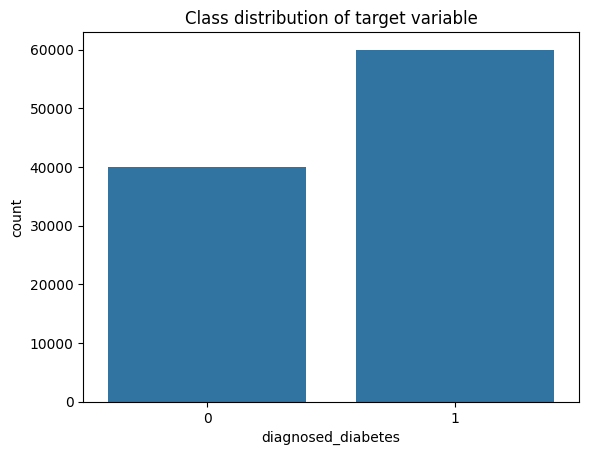

In [9]:
sns.countplot(x='diagnosed_diabetes', data=diabetes)
plt.title('Class distribution of target variable')
plt.show()

We can see that 60% of the people in the database have diabetes which isn't too far from 50% so we won't be rebalancing the data.

Count the number of different values in column with object type values

In [10]:
unique_counts_object = diabetes.select_dtypes(include=['object']).nunique()

print("Number of unique values in object-type columns:")
print(unique_counts_object)

Number of unique values in object-type columns:
gender               3
ethnicity            5
education_level      4
income_level         5
employment_status    4
smoking_status       3
diabetes_stage       5
dtype: int64


There are no colums of type object with a large amount of different values (max 5) so we can change them into binary values without adding too many columns.

Changing object values into numerical values

In [11]:
categorical_cols = ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

diabetes_numerical = pd.get_dummies(diabetes, columns=categorical_cols, drop_first=True)

print(diabetes_numerical.columns)

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diagnosed_diabetes', 'gender_Male', 'gender_Other', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White',
       'education_level_Highschool', 'education_level_No formal',
       'education_level_Postgraduate', 'income_level_Low',
       'income_level_Lower-Middle', 'income_level_Middle',
       'income_level_Upper-Middle', 'employment_status_Retired',
       'employment_status_Student', 'employment_status_Unemployed',
       'smoking_sta

Heatmap

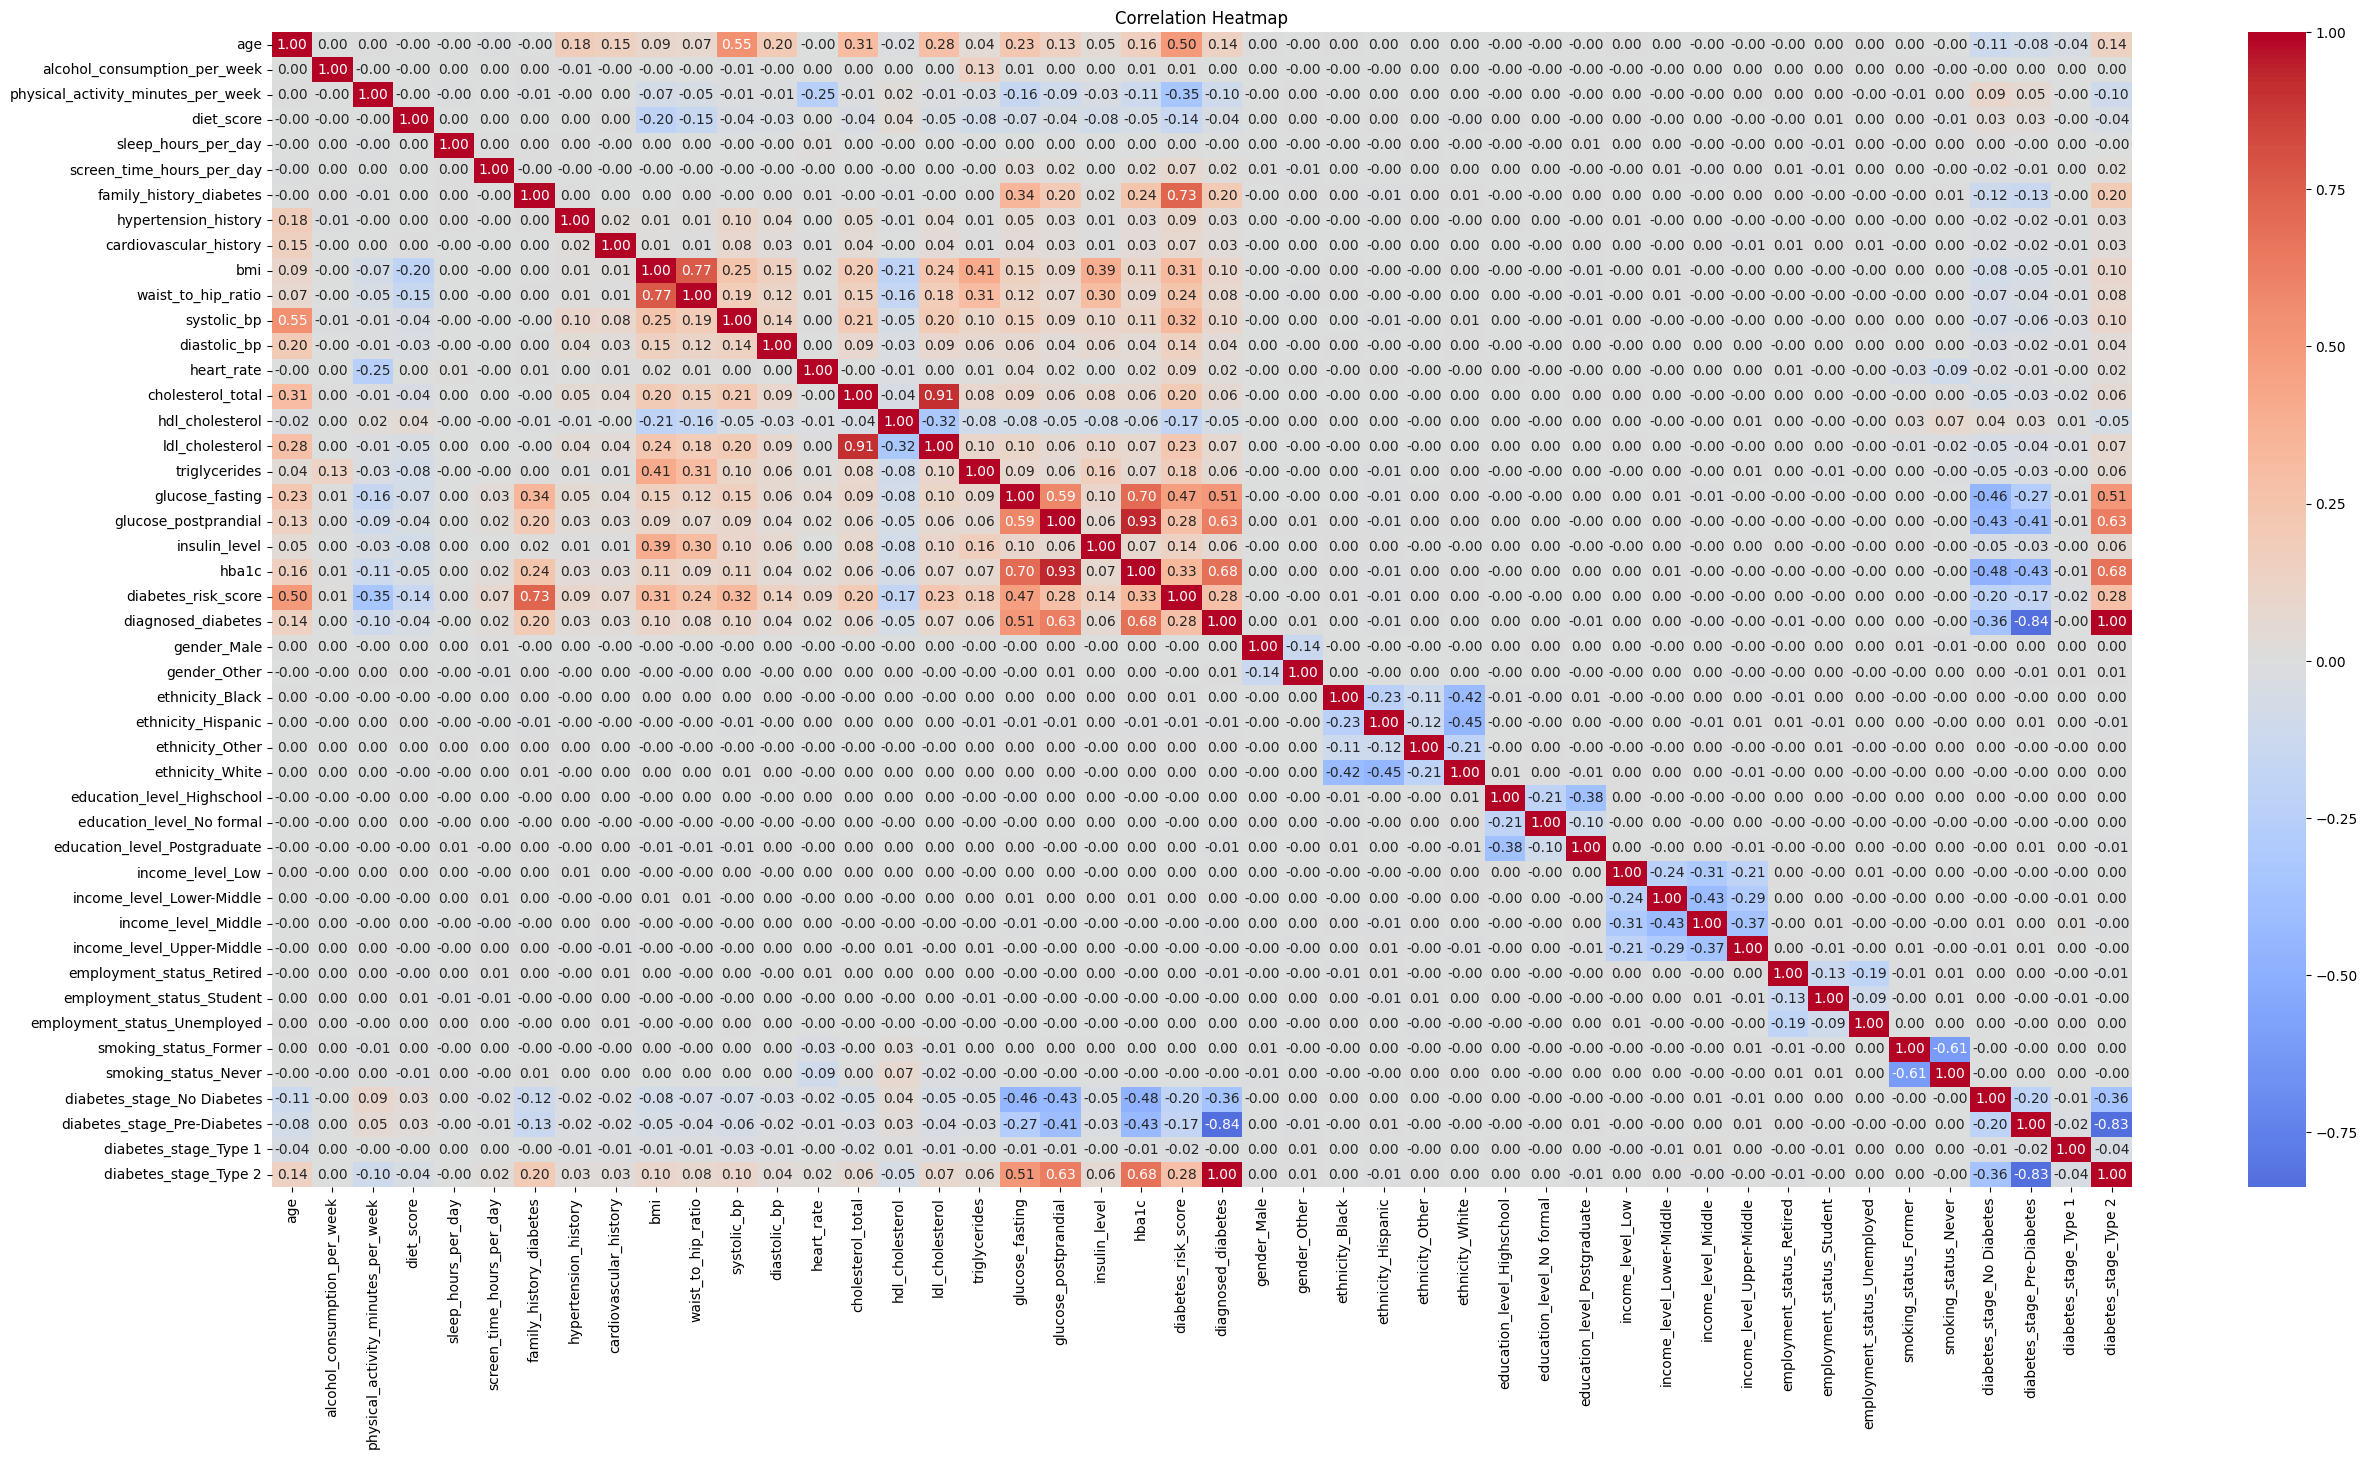

In [12]:
corr = diabetes_numerical.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Droping colums that aren't useful for linear regression

In [13]:
columns_to_drop = [
    'education_level_Highschool',
    'education_level_No formal',
    'education_level_Postgraduate',
    'employment_status_Unemployed',
    'employment_status_Student',
    'employment_status_Retired',
    'income_level_Low',
    'income_level_Lower-Middle',
    'income_level_Middle',
    'income_level_Upper-Middle',
    'sleep_hours_per_day',
    'smoking_status_Never',
    'screen_time_hours_per_day',
    'alcohol_consumption_per_week',
    'ethnicity_Other',
    'ethnicity_White',
    'ethnicity_Hispanic',
    'ethnicity_Black',
    'gender_Male',
    'gender_Other',
    'hdl_cholesterol',
    'heart_rate',
    'smoking_status_Former',
    'diabetes_stage_No Diabetes',
    'diabetes_stage_Pre-Diabetes',
    'diabetes_stage_Type 1',
    'diabetes_stage_Type 2'
  ]

diabetes_numerical_Linear_Regression = diabetes_numerical.drop(columns_to_drop, axis=1)

New heatmap

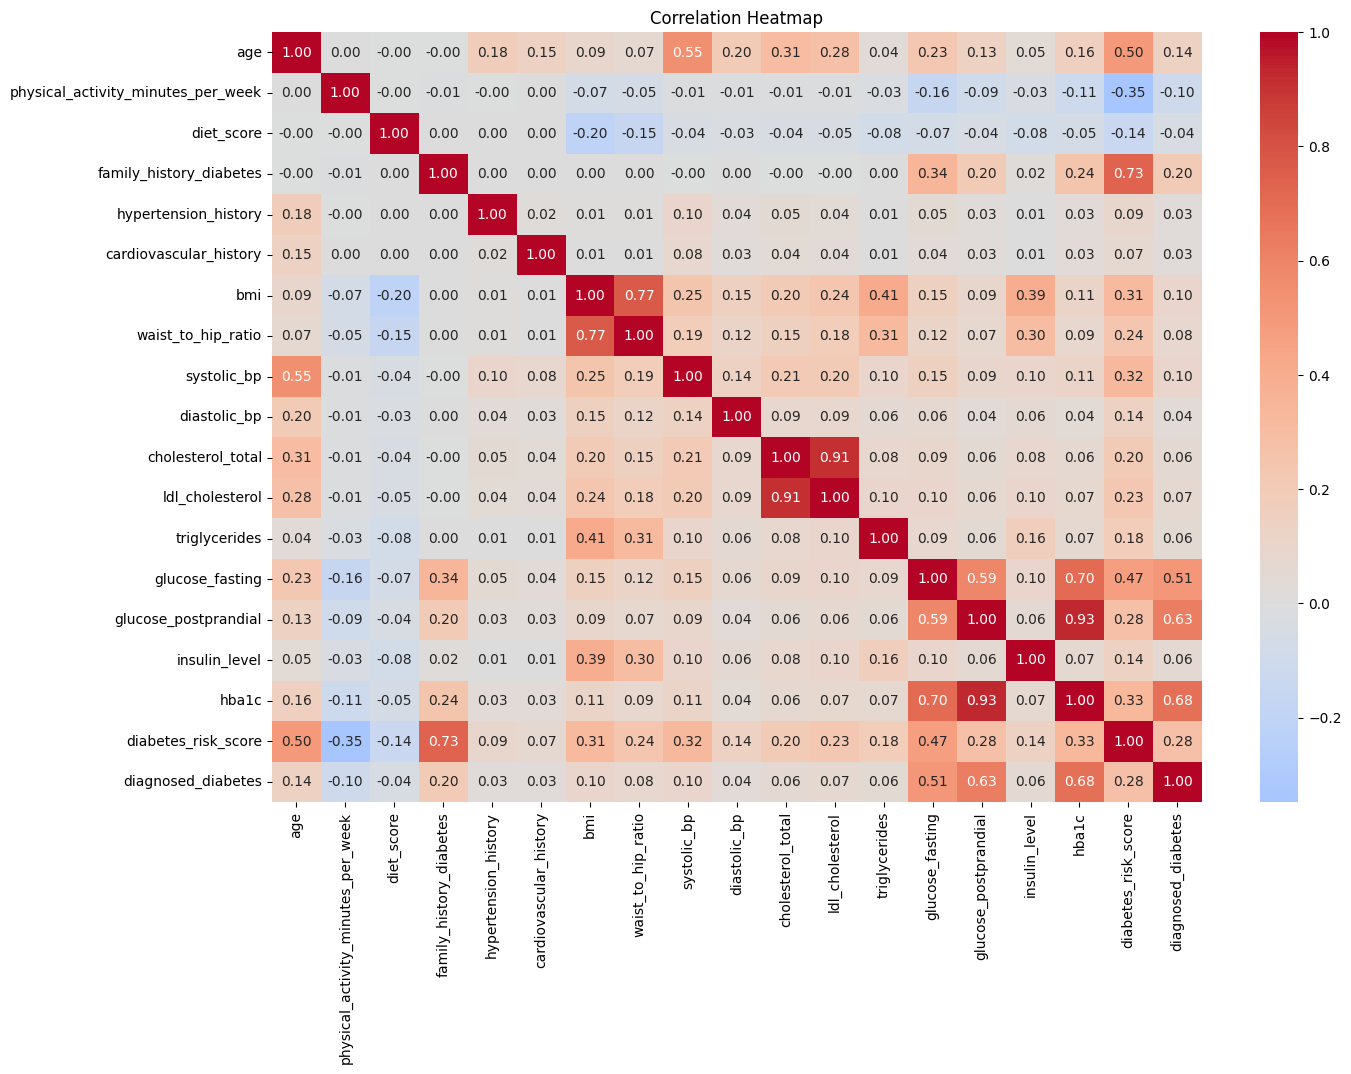

In [14]:
corr = diabetes_numerical_Linear_Regression.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Linear Regression

In [15]:
predictors = [col for col in diabetes_numerical_Linear_Regression.columns if col != 'diagnosed_diabetes']
X = diabetes_numerical_Linear_Regression[predictors]
y = diabetes_numerical_Linear_Regression['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("R^2 score:", lr.score(X_test, y_test))

threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"Accuracy:  {accuracy:.2f}")

R^2 score: 0.4640067066920214

Confusion Matrix:
 [[ 6509  1568]
 [ 1290 10633]]

Precision: 0.87
Recall:    0.89
F1 Score:  0.88
Accuracy:  0.86


**Conclusion**

The linear regression model  explains about 46.4% of the variance in the diagnosed_diabetes outcome. This is considered moderate.  In the context of complex health outcomes like diabetes, which are influenced by many factors, this is a reasonable starting result.

The model achieves a balanced tradeoff between precision (0.87) and recall (0.89), indicating it effectively identifies true diabetes cases while maintaining low false positive rates which is important in healthcare to avoid missed diagnoses and unnecessary interventions.

Although the precision and recall are quite high, a more complex model could increase them even more since there is substantial part of variability that remains unexplained.

## Logistic Regression

In [16]:
columns_to_drop = [
   'diabetes_stage_No Diabetes',
   'diabetes_stage_Pre-Diabetes',
   'diabetes_stage_Type 1',
   'diabetes_stage_Type 2'
]

diabetes_useful = diabetes_numerical.drop(columns_to_drop, axis=1)

predictors = [col for col in diabetes_useful.columns if col != 'diagnosed_diabetes']
X = diabetes_useful[predictors]
y = diabetes_useful['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape : ", diabetes_useful.shape)

Shape :  (100000, 42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print();
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"Accuracy:  {accuracy:.2f}")

[[ 6516  1561]
 [ 1292 10631]]

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8077
           1       0.87      0.89      0.88     11923

    accuracy                           0.86     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.86      0.86     20000


Precision: 0.87
Recall:    0.89
F1 Score:  0.88
Accuracy:  0.86


**Conclusion**

Logistic regression is a good baseline model for binary classification, due to its simplicity and interpretability.
We can see here that it performs really similarly as the linear model here with less than 10 difference in TP, FP, TN, FN.

## Grid Search

In [36]:
param_grid = {
    'penalty': ['l2'],
    'C': [1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 300]
}

logreg = LogisticRegression()

grid_search_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=1,
    error_score='raise'
)

grid_search_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best CV score (Logistic Regression):", grid_search_lr.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=  13.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   8.5s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   8.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   8.4s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   8.5s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   7.9s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   8.5s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   8.9s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   7.4s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   8.3s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   8.9s
[CV] END ...C=10, max_iter=300, penalty=l2, solve

**Conclusion**

The grid search successfully completed and found the optimal logistic regression settings: regularization parameter C=10, penalty 'l2', solver 'liblinear', and max_iter = 100. The best cross-validated accuracy score is quite high (0.857), indicating good classification on this data.

## Ensemble model

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

In [ ]:
svc = SVC(probability=False, random_state=42)
lr = LogisticRegression(random_state=42)
ensemble = VotingClassifier(estimators=[('dt', best_dt), ('svc', svc), ('lr', lr)], voting='hard', n_jobs=-1)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('lr', LogisticRegression(random_state=42))],
                 n_jobs=-1)

In [ ]:
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8655
Precision: 0.9057034888830301
Recall: 0.8643797701920658
F1 Score: 0.884559265299116
Confusion Matrix:
 [[ 7004  1073]
 [ 1617 10306]]


**Conclusion**

Comparision with linear model :
- Accuracy: Both are similar (~86–87%)
- Precision: Ensemble is higher (0.91 vs. 0.87) -> when it predicts diabetes, it's more likely to be correct.
- Recall: Linear model is higher (0.89 vs. 0.86) -> finds more of the actual diabetic cases.
- F1 Score: Nearly identical -> similar tradeoff between precision and recall

Confusion Matrix Differences:

- Ensemble: More true negatives (better at correctly predicting non-diabetics), slightly more false negatives (misses more actual diabetics than the linear model).
- Linear: Fewer false negatives, but more false positives.

In the case of diabetes, having fewer false negative would brobably be better since we wouldn't want to miss someone who has diabetes so the linear model would be slightly better.

In [ ]:
svc = SVC(probability=True, random_state=42)
lr = LogisticRegression(random_state=42)
ensemble = VotingClassifier(estimators=[('dt', best_dt), ('svc', svc), ('lr', lr)], voting='soft', n_jobs=-1)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('lr', LogisticRegression(random_state=42))],
                 n_jobs=-1, voting='soft')

In [ ]:
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.89175
Precision: 0.9353140613847252
Recall: 0.8792250272582404
F1 Score: 0.9064026630928191
Confusion Matrix:
 [[ 7352   725]
 [ 1440 10483]]


## Applying ensemble models: Voting Bagging or Stacking

### Voting model

In [ ]:
clf1 = LogisticRegression(max_iter=500)
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = SVC(kernel='linear')

voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard'
)
voting_clf.fit(X_train_scaled, y_train)
print("Voting Ensemble Accuracy:", voting_clf.score(X_test, y_test))

### Bagging model

In [ ]:
bagging = BaggingClassifier(
    estimator=LogisticRegression(max_iter=500),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_train, y_train)
print("Bagging Ensemble Accuracy:", bagging.score(X_test_scaled, y_test))

### Stacking model

In [ ]:
estimators = [
    ('lr', LogisticRegression(max_iter=500)),
    ('dt', DecisionTreeClassifier(max_depth=5))
]
final_est = SVC(kernel='linear', probability=True)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_est,
    cv=3
)
stacking.fit(X_train_scaled, y_train)
print("Stacking Ensemble Accuracy:", stacking.score(X_test_scaled, y_test))

### Comparison

In [ ]:
models = ['Voting', 'Bagging', 'Stacking']
accuracies = [voting_clf.score(X_test, y_test), bagging.score(X_test, y_test), stacking.score(X_test, y_test)]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['steelblue', 'forestgreen', 'darkorange'])
plt.ylim(0.9985, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Ensemble Model Accuracies')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.00002, f'{acc:.5f}',
             ha='center', va='bottom', fontsize=11)

plt.show()

**Conclusion**

